In [1044]:
import math
from numpy import log as ln
from numpy import log10 as log
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [1045]:
def plotFunction(x, y):
    temp_figure = plt.figure()
    plt.plot(x, y)    
    plt.scatter(x,y)
    plt.title(y.name + " vs. " + x.name)
    plt.xlabel(x.name, fontsize=16)
    plt.ylabel(y.name, fontsize=16)
    plt.show()

In [1046]:
def printLinearFitResult(result):
    slope, intercept, r_value, p_value, std_err = result
    print("Slope = " + str(slope))
    print("Intercept = " + str(intercept))
    print("R Value = " + str(r_value))
    print("P Value = " + str(p_value))
    print("Standar Error = " + str(std_err))
    print()

## Question 4c

In [1047]:
def computePressureForQ3(Pi, q, k, h, a, mu, r, t):
    return (Pi - ((q*mu)/(4*math.pi*k*h)) * (ln((r**2)/(a*t))+.57721))*157.97

In [1048]:
Pi = 1000 #psi
q = 100 #ft^3/day
k = 50 #mD
h = 20 #ft
a = 10 #ft^2/day
rw = .25 #ft
mu = 1 #cp
t = 1
delta_t = .001
delta_r = .001

In [1049]:
Pn = computePressureForQ3(Pi, q, k, h, a, mu, rw, t)

In [1050]:
Pn_plus_1 = computePressureForQ3(Pi, q, k, h, a, mu, rw, t+delta_t)
#Pn_plus_1

In [1051]:
Pn_minus_1 = computePressureForQ3(Pi, q, k, h, a, mu, rw, t-delta_t)
#Pn_minus_1

In [1052]:
(Pn_plus_1 - Pn)/delta_t

1.2564571807160974

In [1053]:
(Pn - Pn_minus_1)/delta_t

1.2577142915688455

In [1054]:
(Pn_plus_1 - Pn_minus_1)/(2*delta_t)

1.2570857361424714

In [1055]:
Pi_middle = computePressureForQ3(Pi, q, k, h, a, mu, rw, t)
Pi_plus_1 = computePressureForQ3(Pi, q, k, h, a, mu, rw+delta_r, t)
Pi_minus_1 = computePressureForQ3(Pi, q, k, h, a, mu, rw-delta_r, t)
#print(Pi_neutral)
#print(Pi_plus_1)
#print(Pi_minus_1)

In [1056]:
(Pi_minus_1 - 2*Pi_middle + Pi_plus_1)/(delta_r**2)

40.227023418992758

## Question 4

In [1057]:
Pi = 1000 #psi
q = 100 #ft^3/day
k = 50 #mD
h = 20 #ft
a = 10 #ft^2/day
rw = .25 #ft
mu = 1 #cp
t = 1
delta_t = .001
delta_r = .001

In [1058]:
delta_t_vector = np.linspace(.001,.01, 100)
delta_r_vector = np.linspace(.0001,.001, 100)

In [1059]:
Pn_plus_vector = computePressureForQ3(Pi, q, k, h, a, mu, rw, t+delta_t_vector)

In [1060]:
Pn_minus_vector = computePressureForQ3(Pi, q, k, h, a, mu, rw, t-delta_t_vector)

In [1061]:
forward_approx_deriv = (Pn_plus_vector - Pn)/delta_t_vector
forward_approx

array([ 1.25645718,  1.25640013,  1.25634309,  1.25628603,  1.25622901,
        1.25617197,  1.25611494,  1.25605792,  1.2560009 ,  1.25594391,
        1.25588691,  1.25582991,  1.25577292,  1.25571595,  1.25565898,
        1.25560201,  1.25554506,  1.2554881 ,  1.25543116,  1.25537423,
        1.2553173 ,  1.25526037,  1.25520346,  1.25514655,  1.25508964,
        1.25503275,  1.25497586,  1.25491898,  1.2548621 ,  1.25480524,
        1.25474837,  1.25469152,  1.25463467,  1.25457783,  1.254521  ,
        1.25446417,  1.25440736,  1.25435054,  1.25429374,  1.25423693,
        1.25418015,  1.25412336,  1.25406658,  1.2540098 ,  1.25395305,
        1.25389629,  1.25383954,  1.25378279,  1.25372605,  1.25366932,
        1.2536126 ,  1.25355588,  1.25349917,  1.25344247,  1.25338577,
        1.25332908,  1.2532724 ,  1.25321572,  1.25315905,  1.25310239,
        1.25304574,  1.25298909,  1.25293245,  1.25287581,  1.25281918,
        1.25276256,  1.25270595,  1.25264934,  1.25259274,  1.25

In [1062]:
backward_approx_deriv = (Pn - Pn_minus_vector)/delta_t_vector
backward_approx

array([ 1.25771429,  1.25777151,  1.25782872,  1.25788597,  1.2579432 ,
        1.25800044,  1.25805769,  1.25811496,  1.25817224,  1.25822952,
        1.25828678,  1.25834408,  1.25840137,  1.25845868,  1.25851598,
        1.25857331,  1.25863063,  1.25868797,  1.2587453 ,  1.25880264,
        1.25886   ,  1.25891736,  1.25897473,  1.2590321 ,  1.25908947,
        1.25914686,  1.25920426,  1.25926166,  1.25931906,  1.25937648,
        1.2594339 ,  1.25949133,  1.25954877,  1.25960622,  1.25966366,
        1.25972111,  1.25977858,  1.25983606,  1.25989353,  1.25995102,
        1.26000851,  1.26006601,  1.26012351,  1.26018102,  1.26023855,
        1.26029607,  1.26035361,  1.26041115,  1.2604687 ,  1.26052625,
        1.26058381,  1.26064138,  1.26069895,  1.26075654,  1.26081413,
        1.26087173,  1.26092933,  1.26098694,  1.26104456,  1.26110218,
        1.26115981,  1.26121746,  1.2612751 ,  1.26133276,  1.26139041,
        1.26144808,  1.26150576,  1.26156344,  1.26162113,  1.26

In [1063]:
center_approx_deriv = (Pn_plus_vector - Pn_minus_vector)/(2*(delta_t_vector))
center_approx

array([ 1.25708574,  1.25708582,  1.25708591,  1.257086  ,  1.2570861 ,
        1.2570862 ,  1.25708631,  1.25708644,  1.25708657,  1.25708671,
        1.25708685,  1.25708699,  1.25708714,  1.25708732,  1.25708748,
        1.25708766,  1.25708785,  1.25708804,  1.25708823,  1.25708844,
        1.25708865,  1.25708887,  1.25708909,  1.25708933,  1.25708956,
        1.25708981,  1.25709006,  1.25709032,  1.25709058,  1.25709086,
        1.25709114,  1.25709143,  1.25709172,  1.25709202,  1.25709233,
        1.25709264,  1.25709297,  1.2570933 ,  1.25709363,  1.25709397,
        1.25709433,  1.25709468,  1.25709505,  1.25709541,  1.2570958 ,
        1.25709618,  1.25709657,  1.25709697,  1.25709738,  1.25709779,
        1.25709821,  1.25709863,  1.25709906,  1.2570995 ,  1.25709995,
        1.2571004 ,  1.25710086,  1.25710133,  1.25710181,  1.25710229,
        1.25710278,  1.25710327,  1.25710377,  1.25710428,  1.2571048 ,
        1.25710532,  1.25710585,  1.25710639,  1.25710693,  1.25

In [1064]:
Pi_plus_vector = computePressureForQ3(Pi, q, k, h, a, mu, rw+delta_r_vector, t)

In [1065]:
Pi_minus_vector = computePressureForQ3(Pi, q, k, h, a, mu, rw-delta_r_vector, t)

In [1080]:
center_second_deriv = (Pi_plus_vector - 2*Pn + Pi_minus_vector)/delta_r_vector/delta_r_vector
center_second_deriv

array([ 40.22731446,  40.22652623,  40.22500682,  40.22487924,
        40.22721098,  40.22560915,  40.22624698,  40.2262545 ,
        40.22679043,  40.22681969,  40.22727486,  40.22658686,
        40.22570797,  40.22652623,  40.22696055,  40.22656964,
        40.22649604,  40.22667595,  40.2262209 ,  40.22681969,
        40.22644225,  40.22664086,  40.22666771,  40.22655161,
        40.22631661,  40.22652623,  40.22633866,  40.22679043,
        40.22662752,  40.2263795 ,  40.22647822,  40.22647632,
        40.22676827,  40.22658686,  40.22668926,  40.22670652,
        40.22680853,  40.22667907,  40.22663929,  40.22681969,
        40.22678855,  40.22669988,  40.22668555,  40.22673757,
        40.22673238,  40.22678825,  40.22689882,  40.22674432,
        40.22675596,  40.22681969,  40.22674114,  40.2268087 ,
        40.2267425 ,  40.22681281,  40.22684053,  40.22682939,
        40.22678282,  40.22678009,  40.22681747,  40.22681969,
        40.22685951,  40.22686589,  40.2268415 ,  40.22

#### 1)	Plot of the 1st derivative with respect to t versus delta_t. All three approximations (forward, backward, centered) should be shown

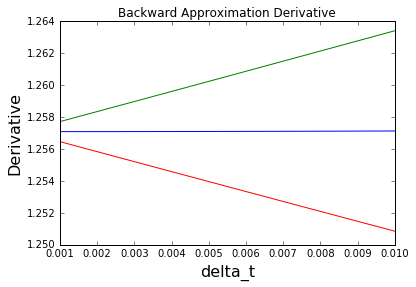

In [1067]:
first_plot = plt.figure()
plt.plot(delta_t_vector, backward_approx_deriv,'g')    
plt.plot(delta_t_vector, forward_approx_deriv,'r') 
plt.plot(delta_t_vector, center_approx_deriv,'b')    
plt.title('Backward Approximation Derivative')
plt.xlabel('delta_t', fontsize=16)
plt.ylabel('Derivative', fontsize=16)
plt.show()

#### 2)	Plot of the absolute error of dP/dt for forward and backward approximations versus an appropriate variable related to t. Perform a linear curve fit to the data. 

In [1068]:
actual_derivative = (q*mu)/(4*math.pi*k*h*t) * 157.97

Linear Fit for Forward Approximation:
Slope = 0.623964719816
Intercept = 9.70781405014e-06
R Value = 0.999998789299
P Value = 5.30255332666e-277
Standar Error = 9.80800870622e-05



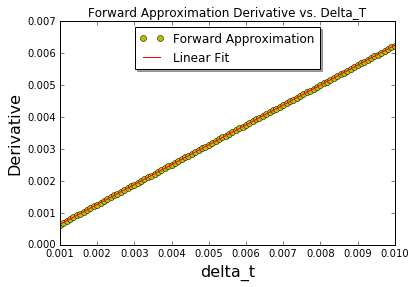

In [1069]:
absolute_error_forward = abs(actual_derivative-forward_approx_deriv)
absolute_error_backward = abs(actual_derivative-backward_approx_deriv)

linear_fit_forward = stats.linregress(delta_t_vector, absolute_error_forward)
print("Linear Fit for Forward Approximation:")
printLinearFitResult(linear_fit_forward)

second_plot_a = plt.figure()
plt.plot(delta_t_vector, absolute_error_forward,'yo',label="Forward Approximation")    
plt.plot(delta_t_vector, linear_fit_forward[0]* delta_t_vector+ linear_fit_forward[1],'r',label="Linear Fit")    
plt.title('Forward Approximation Derivative vs. Delta_T')
plt.xlabel('delta_t', fontsize=16)
plt.ylabel('Derivative', fontsize=16)
plt.legend(loc='upper center', shadow=True)
plt.show()

Linear Fit for Backward Approximation:
Slope = 0.633183904108
Intercept = -9.87474710162e-06
R Value = 0.999998762432
P Value = 1.55439513797e-276
Standar Error = 0.000100627520489



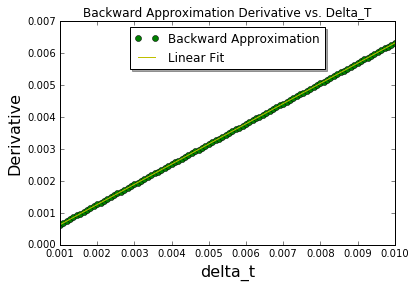

In [1070]:
linear_fit_backward = stats.linregress(delta_t_vector, absolute_error_backward)
print("Linear Fit for Backward Approximation:")
printLinearFitResult(linear_fit_backward)

second_plot_b = plt.figure()
plt.plot(delta_t_vector, absolute_error_backward,'go',label="Backward Approximation")    
plt.plot(delta_t_vector,  linear_fit_backward[0]* delta_t_vector+ linear_fit_backward[1],'y',label="Linear Fit")    
plt.title('Backward Approximation Derivative vs. Delta_T')
plt.xlabel('delta_t', fontsize=16)
plt.ylabel('Derivative', fontsize=16)
plt.legend(loc='upper center', shadow=True)
plt.show()

#### 3)	Plot of the absolute error of dy/dt for centered approximations versus an appropriate variable related to t. Perform a linear curve fit to the data. 

Linear Fit for Center Approximation:
Slope = 0.419056025614
Intercept = -7.40725037256e-10
R Value = 0.999999989152
P Value = 0.0
Standar Error = 6.2351790677e-06



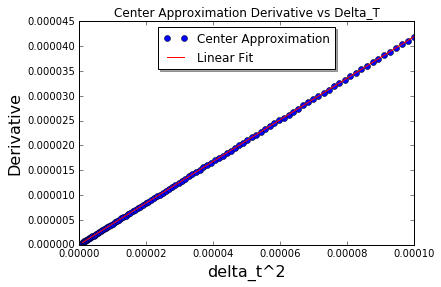

0.41905602561405919

In [1071]:
absolute_error_center = abs(actual_derivative-center_approx_deriv)

linear_fit_center = stats.linregress(delta_t_vector**2, absolute_error_center)
print("Linear Fit for Center Approximation:")
printLinearFitResult(linear_fit_center)

third_plot = plt.figure()
plt.plot(delta_t_vector**2, absolute_error_center,'bo',label="Center Approximation") 
plt.plot(delta_t_vector**2, absolute_error_center,'r',label="Linear Fit")  
plt.title('Center Approximation Derivative vs Delta_T')
plt.xlabel('delta_t^2', fontsize=16)
plt.ylabel('Derivative', fontsize=16)
plt.legend(loc='upper center', shadow=True)
plt.show()
linear_fit_center[0]

#### 4)	Plot of the 2nd derivative with respect to “r” versus r. 

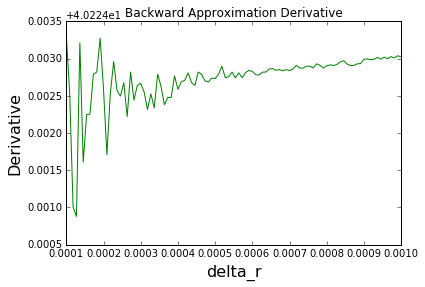

In [1084]:
fourth_plot = plt.figure()
plt.plot(delta_r_vector, center_second_deriv,'g')    
plt.title('Backward Approximation Derivative')
plt.xlabel('delta_r', fontsize=16)
plt.ylabel('Derivative', fontsize=16)
plt.show()

#### 5)	Plot of the absolute error d2P/dr2 versus an appropriate variable related to r. Perform a linear curve fit to the data. 

In [1073]:
# Calculate the actual value for d2p/dr2
actual_second_deriv = .5*q*mu/(math.pi*k*h*rw**2) * 157.97
actual_second_deriv

40.22673017636273

Linear Fit for Center Approximation:
Slope = 41.9056025614
Intercept = -7.40725037253e-10
R Value = 0.999999989152
P Value = 0.0
Standar Error = 0.000623517919533



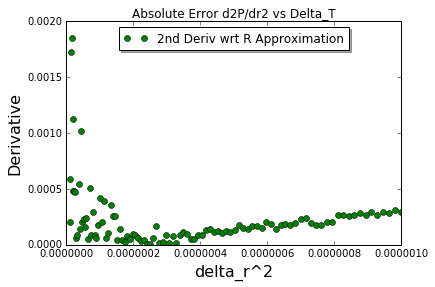

In [1090]:
absolute_error_second_deriv = abs(actual_second_deriv - center_second_deriv)

linear_fit_center_second_deriv = stats.linregress(delta_r_vector**2, absolute_error_center)
print("Linear Fit for Center Approximation:")
printLinearFitResult(linear_fit_center_second_deriv)

fifth_plot = plt.figure()
plt.plot(delta_r_vector**2, absolute_error_second_deriv,'go',label="2nd Deriv wrt R Approximation") 
#plt.plot(delta_r_vector, absolute_error_second_deriv[0]* delta_r_vector+ absolute_error_second_deriv[1],'y',label="Linear Fit")    

plt.title('Absolute Error d2P/dr2 vs Delta_T')
plt.xlabel('delta_r^2', fontsize=16)
plt.ylabel('Derivative', fontsize=16)
plt.legend(loc='upper center', shadow=True)
plt.show()
